# Bonus Assignment - Natural Language Processing - Bonus Question 2


In addressing bonus question 2, the goal was to improve the performance of our models by incorporating additional datasets and leveraging existing pre-trained models. Our methodology involved several key steps, each aimed at understanding and optimizing the performance of different models on personality trait prediction from text. For this bonus question, the transformer model is used as the model to evaluate the results on.

Dataset Integration and Preprocessing
We began by processing the original dataset with the additional dataset from Pennebaker en King (1999) which is concerning personality traits. Preprocessing steps included checking the tokenized length of the text to see if the adjusted chunking method was necessary. Moreover, the predictor values were changed to a binary format. This ensured that the merged dataset was coherent and suitable for training our models.



In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from sklearn.datasets import make_multilabel_classification
import numpy as np


In [ ]:
#Install necessary packages
!pip install nvidia-ml-py3
!pip install scikit-multilearn
!pip install evaluate
!pip install datasets
! pip install -U accelerate
! pip install -U transformers
!pip install tensorboard

  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19171 sha256=40b039b98fd359348549c8f33fe16347244fb6e97ebf07805f778e8b838aa825
  Stored in directory: /root/.cache/pip/wheels/5c/d8/c0/46899f8be7a75a2ffd197a23c8797700ea858b9b34819fbf9e
Successfully built nvidia-ml-py3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 31.7 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 

In [ ]:
from pynvml import *

def print_gpu_utilization():
    nvmlInit()
    handle = nvmlDeviceGetHandleByIndex(0)
    info = nvmlDeviceGetMemoryInfo(handle)
    print(f"GPU memory occupied: {info.used//1024**2} MB.")


def print_summary(result):
    print(f"Time: {result.metrics['train_runtime']:.2f}")
    print(f"Samples/second: {result.metrics['train_samples_per_second']:.2f}")
    print_gpu_utilization()

In [ ]:
data = pd.read_csv("drive/MyDrive/Levy/english_dutch_texts.csv")
essays = pd.read_csv("drive/MyDrive/Levy/essays.csv", encoding='ISO-8859-1')

In [ ]:
essays

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",n,y,y,n,y
1,1997_605191.txt,"Well, here we go with the stream of consciousn...",n,n,y,n,n
2,1997_687252.txt,An open keyboard and buttons to push. The thin...,n,y,n,y,y
3,1997_568848.txt,I can't believe it! It's really happening! M...,y,n,y,y,n
4,1997_688160.txt,"Well, here I go with the good old stream of co...",y,n,y,n,y
...,...,...,...,...,...,...,...
2462,2004_493.txt,I'm home. wanted to go to bed but remembe...,n,y,n,y,n
2463,2004_494.txt,Stream of consiousnesssskdj. How do you s...,y,y,n,n,y
2464,2004_497.txt,"It is Wednesday, December 8th and a lot has be...",n,n,y,n,n
2465,2004_498.txt,"Man this week has been hellish. Anyways, now i...",n,y,n,n,y


In [ ]:
essays['cEXT'] = essays['cEXT'].map({'y': 1, 'n': 0})
essays['cNEU'] = essays['cNEU'].map({'y': 1, 'n': 0})
essays['cAGR'] = essays['cAGR'].map({'y': 1, 'n': 0})
essays['cCON'] = essays['cCON'].map({'y': 1, 'n': 0})
essays['cOPN'] = essays['cOPN'].map({'y': 1, 'n': 0})
essays.drop(columns=['#AUTHID'], inplace=True)


In [ ]:
essays.isna().sum()

TEXT    0
cEXT    0
cNEU    0
cAGR    0
cCON    0
cOPN    0
dtype: int64

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased", use_fast=True)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["TEXT"], truncation=False)

In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(essays)

tokenized_all = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2467 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (802 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
# Assuming tokenized_all['input_ids'] is your list of lists
tokenized_lists = tokenized_all['input_ids']

# Calculate the mean length of the tokenized samples
mean_length = sum(len(token_list) for token_list in tokenized_lists) / len(tokenized_lists)
print(mean_length)

804.4037292257804


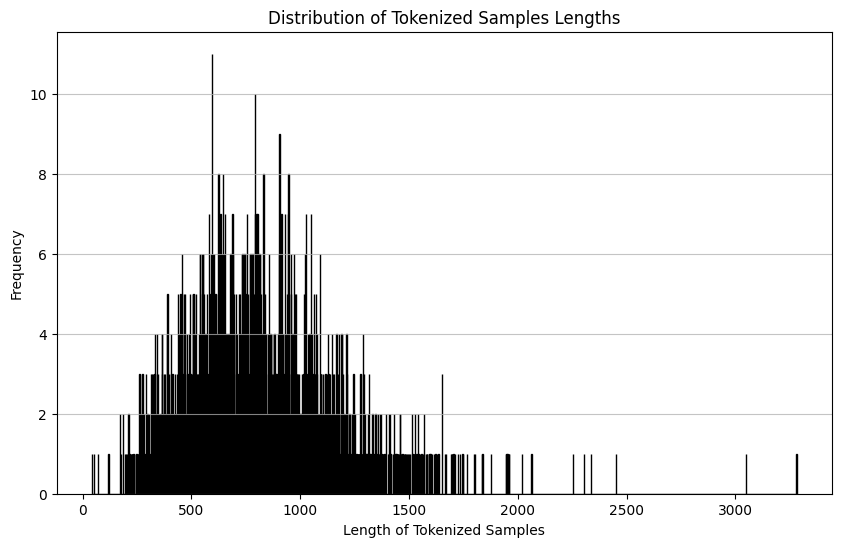

In [ ]:
import matplotlib.pyplot as plt

# Extract lengths of each tokenized list
lengths = [len(token_list) for token_list in tokenized_all['input_ids']]

# Create a bar plot to visualize the distribution of lengths
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2), align='left', color='blue', edgecolor='black')
plt.title('Distribution of Tokenized Samples Lengths')
plt.xlabel('Length of Tokenized Samples')
plt.ylabel('Frequency')
plt.xticks(range(0, max(lengths) + 1, 500))  # Setting x-axis marks at
plt.grid(axis='y', alpha=0.75)
plt.show()


## Distribution of the length of the tokenized samples

This distribution of the length of the tokenizes samples is rather similar to that of the provided dataset, with the median length being roughly 800, thus indicating that by cutting of the texts at 512 tokens, a lot of information would be lost. Therefore the approach to chunk the inputs is of more use.

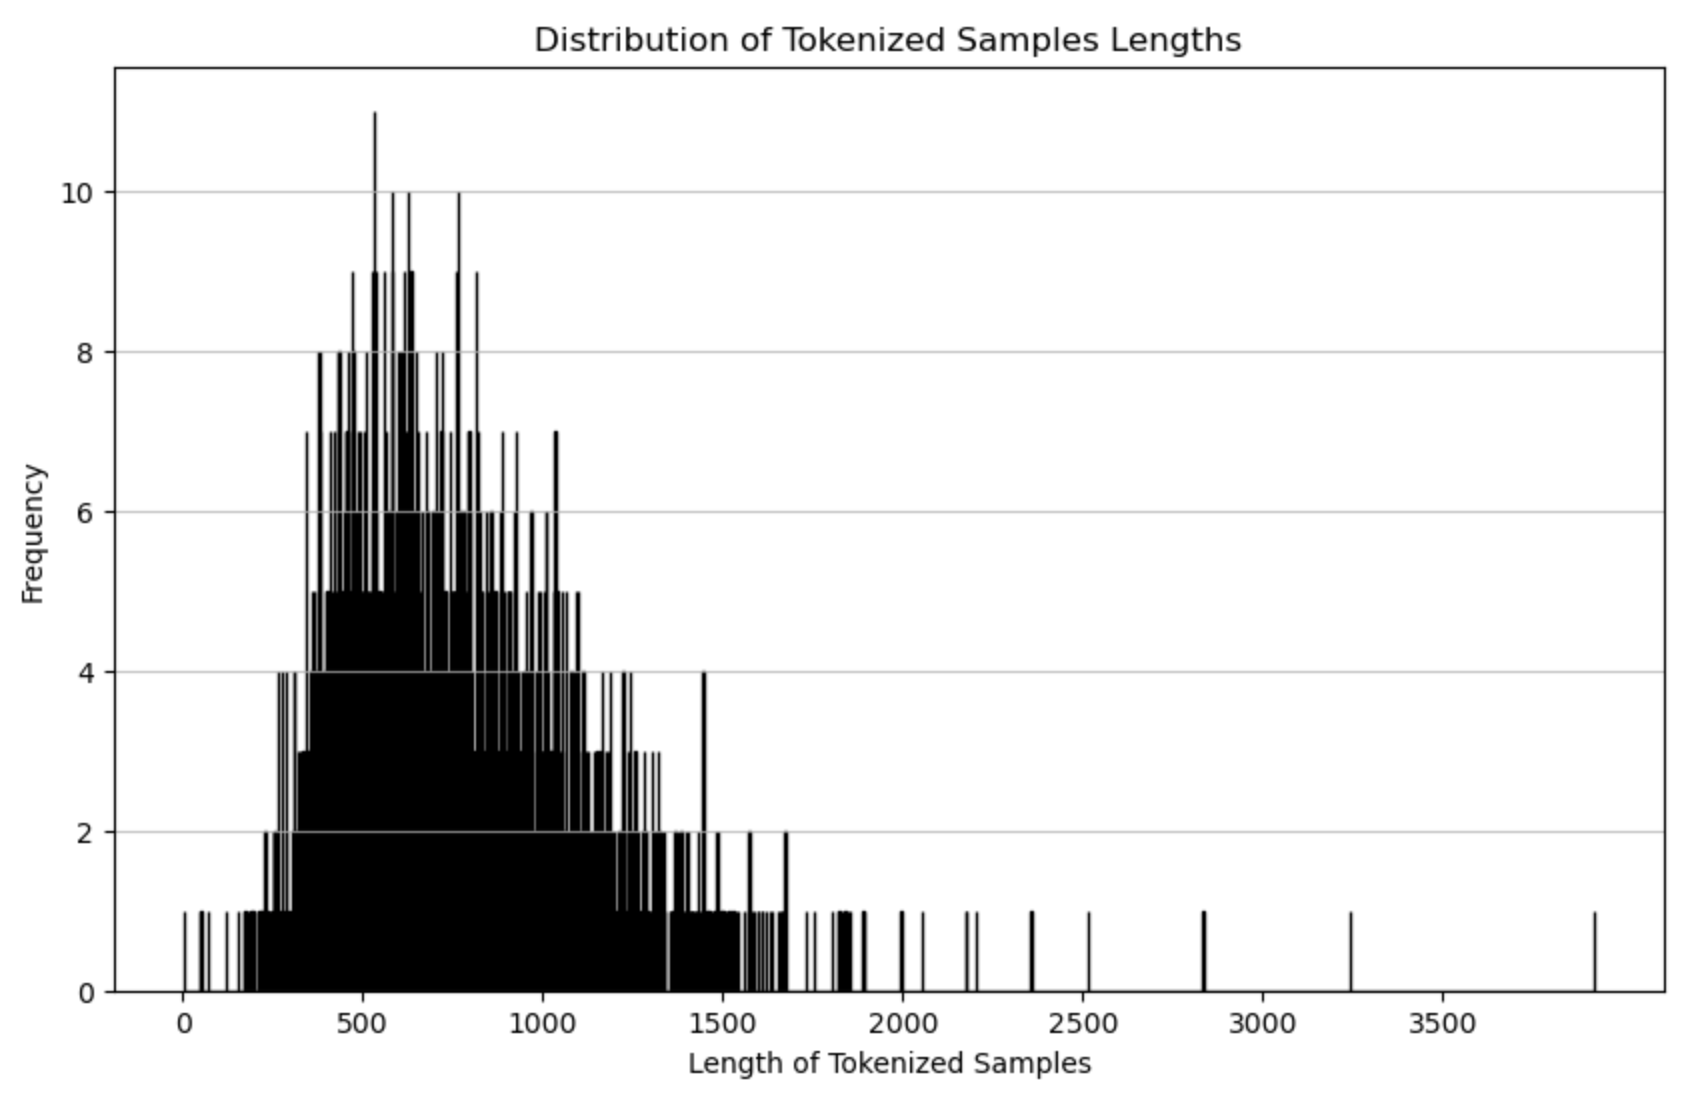


In [ ]:
essays

,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,"Well, right now I just woke up from a mid-day ...",0,1,1,0,1
1,"Well, here we go with the stream of consciousn...",0,0,1,0,0
2,An open keyboard and buttons to push. The thin...,0,1,0,1,1
3,I can't believe it! It's really happening! M...,1,0,1,1,0
4,"Well, here I go with the good old stream of co...",1,0,1,0,1
...,...,...,...,...,...,...
2462,I'm home. wanted to go to bed but remembe...,0,1,0,1,0
2463,Stream of consiousnesssskdj. How do you s...,1,1,0,0,1
2464,"It is Wednesday, December 8th and a lot has be...",0,0,1,0,0
2465,"Man this week has been hellish. Anyways, now i...",0,1,0,0,1


In [ ]:
#Data splitting in english
english_df = data.iloc[:2963]

In [ ]:
#prepare dataset for the original dataset

from skmultilearn.model_selection import iterative_train_test_split

x_eng = english_df['TEXT']
y_eng = english_df[['cEXT',	'cNEU',	'cAGR',	'cCON',	'cOPN']]


# Convert the labels DataFrame to a numpy array
y_eng_array = y_eng.to_numpy()

# Iterative stratification to split the dataset
x_eng_array = x_eng.to_numpy().reshape(-1, 1)
x_eng_train_it, y_eng_train_it, x_eng_test_it, y_eng_test_it = iterative_train_test_split(x_eng_array, y_eng_array, test_size = 0.2)

# Display the shapes of the train and test sets after iterative stratification
print(x_eng_train_it.shape, x_eng_test_it.shape, y_eng_train_it.shape, y_eng_test_it.shape)


(2370, 1) (593, 1) (2370, 5) (593, 5)


In [ ]:
#prepare datasets for splitting the new essays dataset

x_new = essays['TEXT']
y_new = essays[['cEXT',	'cNEU',	'cAGR',	'cCON',	'cOPN']]


# Convert the labels DataFrame to a numpy array
y_new_array = y_new.to_numpy()

# Iterative stratification to split the dataset
x_new_array = x_new.to_numpy().reshape(-1, 1)
x_new_train_it, y_new_train_it, x_new_test_it, y_new_test_it = iterative_train_test_split(x_new_array, y_new_array, test_size = 0.2)

# Display the shapes of the train and test sets after iterative stratification
print(x_new_train_it.shape, x_new_test_it.shape, y_new_train_it.shape, y_new_test_it.shape)


(1973, 1) (494, 1) (1973, 5) (494, 5)


In [ ]:
# train_data = [{'label': row[-5:].tolist(), 'text': row[-6]} for row in english_df.to_numpy()]
# test_data = [{'label': row[-5:].tolist(), 'text': row[-6]} for row in dutch_df.to_numpy()]


# # Creating the final data structure
# multilabel_df = {
#     'train': train_data,
#     'test': test_data
# }

In [ ]:
#combining both datasets into training and testing
x_test_it = np.concatenate((x_eng_test_it, x_new_test_it))
x_train_it = np.concatenate((x_eng_train_it, x_new_train_it))
y_test_it = np.concatenate((y_eng_test_it, y_new_test_it))
y_train_it = np.concatenate((y_eng_train_it, y_new_train_it))

In [ ]:
# Creating a list of dictionaries for the test set
test_data = [{'label': label, 'text': text} for label, text in zip(y_test_it, x_test_it)]
train_data = [{'label': label, 'text': text} for label, text in zip(y_train_it, x_train_it)]

# Creating the final data structure
multilabel_df = {
    'train': train_data,
    'test': test_data
}

In [ ]:
multilabel_df['train'][-1]

{'label': array([0, 1, 1, 0, 1]),
 'text': array(["I have just gotten off the phone with brady. I'm trying to decide what exacly we will do  this weekend. he wants to go to a hotel, but I know I have to babysit and I'm not sure exactly  how I will tell my dad to pick us up from here. My birthday is this weekend, and it doesn't really  even feel like it. I don't really mind, but I have a feeling Brady probably won't do much for it. I  almost feel like I'm always doing something for him. I should, I really care about him. He says  he will pay for the hotel, but I don't really want that for my birthday. I'ts just not htat important  to me. I feel guilty today for lying to my dad about gettin gout of the TIP program. I know that  sometimes I have to lie about things like that in order for them to understand. I haven't heard  from my mom so I'm not sure if she's mad at me or not. She probably doesn't care, but when  she does find out she will freak. I wish Brady would pay more attention. He

In [ ]:
def label_distribution(data):
    # Initialize counts for each label
    label_counts = {i: {'1': 0, '0': 0} for i in range(5)}

    # Iterate over each entry and count the label occurrences
    for entry in data:
        labels = entry['label']
        for i, label in enumerate(labels):
            label_str = str(int(label))  # Convert label to string (either '1' or '0')
            label_counts[i][label_str] += 1

    return label_counts

# Calculating label distributions for train and test sets
train_label_distribution = label_distribution(multilabel_df['train'])
test_label_distribution = label_distribution(multilabel_df['test'])

train_label_distribution, test_label_distribution

({0: {'1': 2214, '0': 2129},
  1: {'1': 2172, '0': 2171},
  2: {'1': 2275, '0': 2068},
  3: {'1': 2213, '0': 2130},
  4: {'1': 2162, '0': 2181}},
 {0: {'1': 553, '0': 534},
  1: {'1': 543, '0': 544},
  2: {'1': 572, '0': 515},
  3: {'1': 558, '0': 529},
  4: {'1': 540, '0': 547}})

After including the new dataset to the original, the class distribution still are relatively balanced. Performance still need to be monitored during training and validation to ensure that this minor difference does not cause underpermoning in some class.

In [ ]:
#Tokenize with multi label multi langual
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
import torch

def tokenize_and_chunk(texts, labels, tokenizer, chunk_size=510):
    input_id_chunks = []
    mask_chunks = []
    chunked_labels = []

    for text, label in zip(texts, labels):
        # Ensure text is a string
        text = str(text)

        # Tokenize without special tokens
        tokens = tokenizer.encode_plus(text, add_special_tokens=False,
                                       return_tensors='pt', truncation=False)

        # Split into chunks of `chunk_size`
        input_ids = tokens['input_ids'][0]
        attention_mask = tokens['attention_mask'][0]
        num_chunks = (len(input_ids) // chunk_size) + int(len(input_ids) % chunk_size != 0)

        for i in range(num_chunks):
            # Define the start and end of the chunk
            start = i * chunk_size
            end = start + chunk_size

            # Extract chunks for input IDs and attention mask
            input_ids_chunk = input_ids[start:end]
            attention_mask_chunk = attention_mask[start:end]

            # Add [CLS] and [SEP] tokens
            input_ids_chunk = torch.tensor([101] + input_ids_chunk.tolist() + [102])
            attention_mask_chunk = torch.tensor([1] + attention_mask_chunk.tolist() + [1])

            # Pad the sequences
            padding_length = 512 - len(input_ids_chunk)
            input_ids_chunk = torch.cat([input_ids_chunk, torch.zeros(padding_length, dtype=torch.long)])
            attention_mask_chunk = torch.cat([attention_mask_chunk, torch.zeros(padding_length, dtype=torch.long)])

            # Store the chunks
            input_id_chunks.append(input_ids_chunk)
            mask_chunks.append(attention_mask_chunk)
            chunked_labels.append(torch.tensor(label, dtype=torch.float))  # Convert label list to tensor of floats

    # Convert lists to tensors
    input_ids_tensor = torch.stack(input_id_chunks)
    attention_mask_tensor = torch.stack(mask_chunks)
    labels_tensor = torch.stack(chunked_labels)  # Stack label tensors

    return input_ids_tensor, attention_mask_tensor, labels_tensor


# Training data
train_texts = [item['text'] for item in multilabel_df['train']]
train_labels = [item['label'] for item in multilabel_df['train']]
input_ids_tensor_train, attention_mask_tensor_train, labels_tensor_train = tokenize_and_chunk(train_texts, train_labels, tokenizer)

# Preparing the training dictionary
input_dict_train = {
    'input_ids': input_ids_tensor_train.long(),
    'attention_mask': attention_mask_tensor_train.int(),
    'labels': labels_tensor_train
}

# Testing data
test_texts = [item['text'] for item in multilabel_df['test']]
test_labels = [item['label'] for item in multilabel_df['test']]
input_ids_tensor_test, attention_mask_tensor_test, labels_tensor_test = tokenize_and_chunk(test_texts, test_labels, tokenizer)

# Preparing the testing dictionary
input_dict_test = {
    'input_ids': input_ids_tensor_test.long(),
    'attention_mask': attention_mask_tensor_test.int(),
    'labels': labels_tensor_test
}

Token indices sequence length is longer than the specified maximum sequence length for this model (830 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
from datasets import Dataset

# Function to convert tensor to list of integers or floats
def tensor_to_list(tensor, dtype=int):
    return [tensor[i].tolist() for i in range(len(tensor))]

# Convert tensors to lists
input_ids_list_train = tensor_to_list(input_ids_tensor_train, dtype=int)
attention_mask_list_train = tensor_to_list(attention_mask_tensor_train, dtype=int)
labels_list_train = tensor_to_list(labels_tensor_train, dtype=float)

input_ids_list_test = tensor_to_list(input_ids_tensor_test, dtype=int)
attention_mask_list_test = tensor_to_list(attention_mask_tensor_test, dtype=int)
labels_list_test = tensor_to_list(labels_tensor_test, dtype=float)

# Create DataFrame
df_train = pd.DataFrame({
    'input_ids': input_ids_list_train,
    'attention_mask': attention_mask_list_train,
    'labels': labels_list_train
})

df_test = pd.DataFrame({
    'input_ids': input_ids_list_test,
    'attention_mask': attention_mask_list_test,
    'labels': labels_list_test
})

# Create Hugging Face Dataset
train_dataset = Dataset.from_pandas(df_train)
test_dataset = Dataset.from_pandas(df_test)


In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
labels = ['cEXT',	'cNEU',	'cAGR',	'cCON',	'cOPN']
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased",
                                  problem_type="multi_label_classification",
                                  num_labels=len(labels),
                                  id2label=id2label,
                                  label2id=label2id)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
[id2label[idx] for idx, value in enumerate(train_dataset['labels'][0]) if value == 1.0]


['cNEU', 'cAGR', 'cOPN']

In [ ]:
output_dir = '/content/drive/MyDrive/Levy/bonus/bert_updated'


In [ ]:
from transformers import TrainingArguments, Trainer, logging

logging.set_verbosity_error()

In [ ]:
print_gpu_utilization()


GPU memory occupied: 233 MB.


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch

def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # finally, compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds,
        labels=p.label_ids)
    return result

In [ ]:
# training_args = TrainingArguments(
#     output_dir=output_dir,
#     learning_rate=1e-5,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=16,
#     num_train_epochs=15,
#     weight_decay=0.01,
#     warmup_steps = 20,
#     logging_steps = 8,
#     evaluation_strategy="epoch",
#     save_strategy="epoch",
#     disable_tqdm = False,
#     load_best_model_at_end=True,
#     push_to_hub=False,
#     gradient_accumulation_steps=8,
#     gradient_checkpointing=True,
#     fp16=True,
# )
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=test_dataset,
#     tokenizer=tokenizer,
#     data_collator=data_collator,
#     compute_metrics=compute_metrics,
# )

# trainer.train()

In [ ]:
#Tokenize with multi label multi langual
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('Minej/bert-base-personality')

tokenizer_config.json:   0%|          | 0.00/400 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
import torch

def tokenize_and_chunk(texts, labels, tokenizer, chunk_size=510):
    input_id_chunks = []
    mask_chunks = []
    chunked_labels = []

    for text, label in zip(texts, labels):
        # Ensure text is a string
        text = str(text)

        # Tokenize without special tokens
        tokens = tokenizer.encode_plus(text, add_special_tokens=False,
                                       return_tensors='pt', truncation=False)

        # Split into chunks of `chunk_size`
        input_ids = tokens['input_ids'][0]
        attention_mask = tokens['attention_mask'][0]
        num_chunks = (len(input_ids) // chunk_size) + int(len(input_ids) % chunk_size != 0)

        for i in range(num_chunks):
            # Define the start and end of the chunk
            start = i * chunk_size
            end = start + chunk_size

            # Extract chunks for input IDs and attention mask
            input_ids_chunk = input_ids[start:end]
            attention_mask_chunk = attention_mask[start:end]

            # Add [CLS] and [SEP] tokens
            input_ids_chunk = torch.tensor([101] + input_ids_chunk.tolist() + [102])
            attention_mask_chunk = torch.tensor([1] + attention_mask_chunk.tolist() + [1])

            # Pad the sequences
            padding_length = 512 - len(input_ids_chunk)
            input_ids_chunk = torch.cat([input_ids_chunk, torch.zeros(padding_length, dtype=torch.long)])
            attention_mask_chunk = torch.cat([attention_mask_chunk, torch.zeros(padding_length, dtype=torch.long)])

            # Store the chunks
            input_id_chunks.append(input_ids_chunk)
            mask_chunks.append(attention_mask_chunk)
            chunked_labels.append(torch.tensor(label, dtype=torch.float))  # Convert label list to tensor of floats

    # Convert lists to tensors
    input_ids_tensor = torch.stack(input_id_chunks)
    attention_mask_tensor = torch.stack(mask_chunks)
    labels_tensor = torch.stack(chunked_labels)  # Stack label tensors

    return input_ids_tensor, attention_mask_tensor, labels_tensor


# Training data
train_texts = [item['text'] for item in multilabel_df['train']]
train_labels = [item['label'] for item in multilabel_df['train']]
input_ids_tensor_train, attention_mask_tensor_train, labels_tensor_train = tokenize_and_chunk(train_texts, train_labels, tokenizer)

# Preparing the training dictionary
input_dict_train = {
    'input_ids': input_ids_tensor_train.long(),
    'attention_mask': attention_mask_tensor_train.int(),
    'labels': labels_tensor_train
}

# Testing data
test_texts = [item['text'] for item in multilabel_df['test']]
test_labels = [item['label'] for item in multilabel_df['test']]
input_ids_tensor_test, attention_mask_tensor_test, labels_tensor_test = tokenize_and_chunk(test_texts, test_labels, tokenizer)

# Preparing the testing dictionary
input_dict_test = {
    'input_ids': input_ids_tensor_test.long(),
    'attention_mask': attention_mask_tensor_test.int(),
    'labels': labels_tensor_test
}

In [ ]:
from datasets import Dataset

# Function to convert tensor to list of integers or floats
def tensor_to_list(tensor, dtype=int):
    return [tensor[i].tolist() for i in range(len(tensor))]

# Convert tensors to lists
input_ids_list_train = tensor_to_list(input_ids_tensor_train, dtype=int)
attention_mask_list_train = tensor_to_list(attention_mask_tensor_train, dtype=int)
labels_list_train = tensor_to_list(labels_tensor_train, dtype=float)

input_ids_list_test = tensor_to_list(input_ids_tensor_test, dtype=int)
attention_mask_list_test = tensor_to_list(attention_mask_tensor_test, dtype=int)
labels_list_test = tensor_to_list(labels_tensor_test, dtype=float)

# Create DataFrame
df_train = pd.DataFrame({
    'input_ids': input_ids_list_train,
    'attention_mask': attention_mask_list_train,
    'labels': labels_list_train
})

df_test = pd.DataFrame({
    'input_ids': input_ids_list_test,
    'attention_mask': attention_mask_list_test,
    'labels': labels_list_test
})

# Create Hugging Face Dataset
train_dataset = Dataset.from_pandas(df_train)
test_dataset = Dataset.from_pandas(df_test)


In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("Minej/bert-base-personality",
                                  problem_type="multi_label_classification",
                                  num_labels=len(labels),
                                  id2label=id2label,
                                  label2id=label2id)

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
output_dir = '/content/drive/MyDrive/Levy/bonus/minej_baseline_updated'


In [ ]:
training_args = TrainingArguments(
    output_dir=output_dir,
    learning_rate=5e-6,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=8,
    weight_decay=0.01,
    warmup_steps = 20,
    logging_steps = 8,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    disable_tqdm = False,
    load_best_model_at_end=True,
    push_to_hub=False,
    gradient_accumulation_steps=8,
    gradient_checkpointing=True,
    fp16=True,
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
0,0.682900,0.680691,0.636227,0.552853,0.053468
1,0.669900,0.673964,0.630855,0.567297,0.064066
2,0.667700,0.667446,0.634642,0.584609,0.072254
3,0.654300,0.664436,0.633788,0.589001,0.069846
4,0.639200,0.662224,0.637995,0.591047,0.073699
5,0.639600,0.661599,0.640868,0.592162,0.077071
6,0.620400,0.658707,0.636593,0.595689,0.076108
7,0.620700,0.659982,0.640544,0.595281,0.077553


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.

TrainOutput(global_step=1112, training_loss=0.651392064077391, metrics={'train_runtime': 1367.252, 'train_samples_per_second': 52.075, 'train_steps_per_second': 0.813, 'total_flos': 1.871822465488896e+16, 'train_loss': 0.651392064077391, 'epoch': 7.99})

# Modeling and Evaluation

BERT Model Enhancement
We used a BERT model, initially trained on the extended dataset for 5 epochs. Here we observed a promising improvement in performance. As the validation loss was decreasing rapidly, we increased the training epochs to 8 and then to 15. This resulted in a notable enhancement in the model's predictive accuracy, resulting in a micro-averaged F1 score of 0.73 and an ROC AUC of 0.72. These results were very good, as they represented the highest scores achieved in all of our experiments.

Use of a Pre-trained personality Huggingface Model
Next, we utilized a Huggingface model pre-trained specifically for personality trait prediction. By using this we wanted to test if a pre-trained model specifically for this task could improve the performance even more. Initially, this model demonstrated a higher F1 score during a 5-epoch training run. However, extending the training to 8 epochs, even with an adjusted learning rate for finer improvements (we lowered it to 5e-6 instead of 1e-5), did not lead to performance enhancements surpassing our BERT model.

Reflections on Model Performance
The underperformance of the specialized Huggingface model, despite its targeted training, was unexpected. This could indicate a lack of generalizability to new, unseen data, suggesting a potential overfitting issue to its training dataset. Unfortunately, there are no details available of the performance of this model, and therefore cannot fully understand its performance characteristics. What can be noted is that this model has been fine-tuned on BERT base uncased, and our implementation always using the cased version. Although the performance difference cannot be stated from this change alone, it does highlight that potentially the nuances when using capitalized letters makes a difference in this personality trait prediction task.

Conclusions
This approach led to an interesting insight: the base model of BERT, when trained on the increased dataset, outperforms a more specialized model in the same task. This underscores the importance of a model's ability to generalize when dealing with complex tasks such as personality prediction from text.

Through this approach, we gained valuable perspectives on task-specific pre-trained models, the crucial role of having more data available, and model generalizability.

Link to the drive folder containing screenshots of the runs: https://drive.google.com/drive/folders/1gUxp5vRYhK13gjTHCr2YndqCmmc23JO3?usp=sharing

References
Pennebaker, J. W., & King, L. A. (1999). Linguistic styles: language use as an individual difference. Journal of Personality and Social Psychology, 77(6), 1296–1312. https://doi.org/10.1037/0022-3514.77.6.1296

Bert baseline with combined datasets

| Epoch | Training Loss | Validation Loss |    F1    |  Roc Auc | Accuracy |
|:-----:|:-------------:|:---------------:|:--------:|:--------:|:--------:|
| 0     | 0.680700      | 0.678448        | 0.587056 | 0.573815 | 0.051185 |
| 2     | 0.642800      | 0.657924        | 0.629830 | 0.603865 | 0.072986 |
| 4     | 0.597900      | 0.647590        | 0.625550 | 0.620769 | 0.097630 |

Bert 8 epochs with combined datasets

| Epoch | Training Loss | Validation Loss |    F1    |  Roc Auc | Accuracy |
|:-----:|:-------------:|:---------------:|:--------:|:--------:|:--------:|
| 0     | 0.583700      | 0.642112        | 0.630580 | 0.639135 | 0.107583 |
| 2     | 0.491100      | 0.618321        | 0.695629 | 0.674136 | 0.157820 |
| 4     | 0.439300      | 0.601418        | 0.701469 | 0.697573 | 0.191469 |
| 6     | 0.396700      | 0.590451        | 0.720304 | 0.713467 | 0.229858 |
| 7     | 0.379500      | 0.587777        | 0.724084 | 0.714801 | 0.231280 |

Bert 15 epochs with combined datasets

| Epoch | Training Loss | Validation Loss |    F1    |  Roc Auc | Accuracy |
|:-----:|:-------------:|:---------------:|:--------:|:--------:|:--------:|
| 0     | 0.680700      | 0.679851        | 0.583576 | 0.552164 | 0.036493 |
| 2     | 0.629100      | 0.656964        | 0.637448 | 0.600673 | 0.078199 |
| 4     | 0.548700      | 0.631546        | 0.654656 | 0.643514 | 0.114692 |
| 6     | 0.480100      | 0.610031        | 0.674069 | 0.668878 | 0.156872 |
| 8     | 0.448500      | 0.597665        | 0.714930 | 0.693082 | 0.197156 |
| 10    | 0.394300      | 0.585504        | 0.721156 | 0.710439 | 0.223697 |
| 12    | 0.365200      | 0.583853        | 0.731721 | 0.723183 | 0.248815 |
| 14    | 0.359500      | 0.583148        | 0.733248 | 0.723364 | 0.249289 |

Hugginface Personality Trained model baseline

| Epoch | Training Loss | Validation Loss |    F1    |  Roc Auc | Accuracy |
|:-----:|:-------------:|:---------------:|:--------:|:--------:|:--------:|
| 0     | 0.676600      | 0.677387        | 0.637700 | 0.561451 | 0.055342 |
| 1     | 0.661600      | 0.665066        | 0.631056 | 0.590349 | 0.078922 |
| 2     | 0.632800      | 0.657511        | 0.632188 | 0.607283 | 0.087103 |
| 3     | 0.612900      | 0.653189        | 0.647121 | 0.609916 | 0.098171 |
| 4     | 0.604400      | 0.651181        | 0.647033 | 0.615368 | 0.100577 |

Hugginface Personality Trained model 8 epochs


| Epoch | Training Loss | Validation Loss |    F1    |  Roc Auc | Accuracy |
|:-----:|:-------------:|:---------------:|:--------:|:--------:|:--------:|
| 0     | 0.603200      | 0.650346        | 0.630122 | 0.610806 | 0.100577 |
| 1     | 0.544500      | 0.632890        | 0.665636 | 0.645080 | 0.129451 |
| 2     | 0.519100      | 0.624866        | 0.684726 | 0.657953 | 0.152551 |
| 3     | 0.486200      | 0.628331        | 0.690597 | 0.665036 | 0.155919 |
| 4     | 0.487400      | 0.620186        | 0.690289 | 0.668171 | 0.158325 |
| 5     | 0.464100      | 0.625740        | 0.702137 | 0.666333 | 0.158807 |
| 6     | 0.440000      | 0.612493        | 0.707481 | 0.679072 | 0.179018 |
| 7     | 0.445500      | 0.614774        | 0.709467 | 0.680666 | 0.186718 |

Hugginface Personality Trained model 8 epochs with adjusted LR


| Epoch | Training Loss | Validation Loss |    F1    |  Roc Auc | Accuracy |
|:-----:|:-------------:|:---------------:|:--------:|:--------:|:--------:|
| 0     | 0.682900      | 0.680691        | 0.636227 | 0.552853 | 0.053468 |
| 1     | 0.669900      | 0.673964        | 0.630855 | 0.567297 | 0.064066 |
| 2     | 0.667700      | 0.667446        | 0.634642 | 0.584609 | 0.072254 |
| 3     | 0.654300      | 0.664436        | 0.633788 | 0.589001 | 0.069846 |
| 4     | 0.639200      | 0.662224        | 0.637995 | 0.591047 | 0.073699 |
| 5     | 0.639600      | 0.661599        | 0.640868 | 0.592162 | 0.077071 |
| 6     | 0.620400      | 0.658707        | 0.636593 | 0.595689 | 0.076108 |
| 7     | 0.620700      | 0.659982        | 0.640544 | 0.595281 | 0.077553 |

